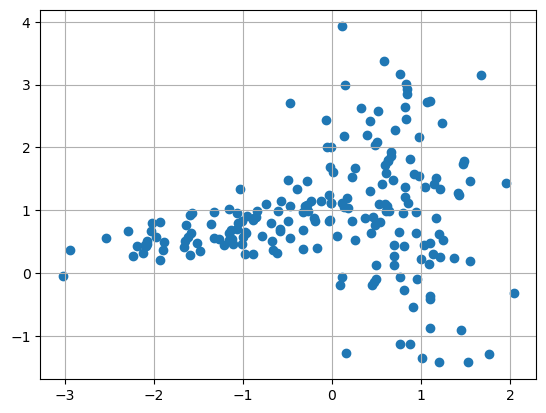

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.grid(True)
plt.scatter  (Xc_2[:,0], Xc_2[:,1])
plt.show()

In [7]:
def kmeans_plusplus_initialization(X, k):
    
    centroids = [X[np.random.choice(len(X))]]  # Це випадкове

    for _ in range(1, k):
        
        # Відстані
        distances = np.array([np.min(np.linalg.norm(x - centroids, axis=1)) for x in X])
        
        # Наступний центроїд по ймовірністі пропорційно відстані
        probabiliti = distances / distances.sum()
        next_centroid = X[np.random.choice(len(X), p=probabiliti)]
        
        centroids.append(next_centroid)

    return np.array(centroids)

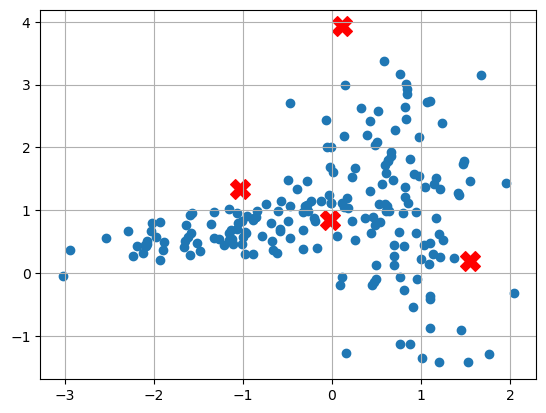

In [11]:
plt.figure()
plt.grid(True)
plt.scatter(Xc_2[:, 0], Xc_2[:, 1])

K = 4 
centroids = kmeans_plusplus_initialization(Xc_2, K)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.show()

In [12]:
def assign_to_closest_centroid(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

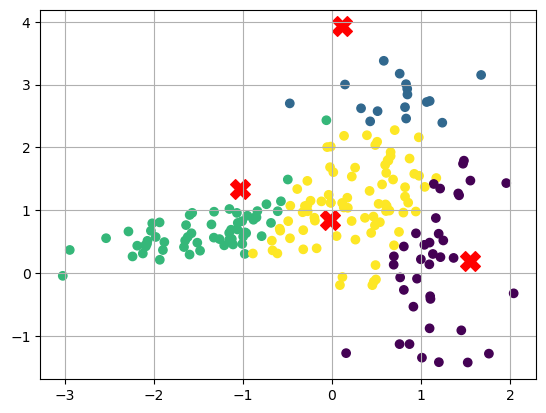

In [13]:
labels = assign_to_closest_centroid(Xc_2, centroids)

plt.figure()
plt.grid(True)
plt.scatter(Xc_2[:, 0], Xc_2[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.show()

In [14]:
def cost_function(X, centroids, labels):
    distances = np.linalg.norm(X - centroids[labels], axis=1)
    return np.sum(distances**2) / len(X)

In [33]:
labels = assign_to_closest_centroid(Xc_2, centroids)
cost = cost_function(Xc_2, centroids, labels)

In [34]:
def compute_new_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

In [35]:
def kmeansplusplus(X, k, max_iterations=100, tol=1e-4):

    centroids = kmeans_plusplus_initialization(X, k)
    for _ in range(max_iterations):
        labels = assign_to_closest_centroid(X, centroids)
        new_centroids = compute_new_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    final_cost = cost_function(X, centroids, labels)
    return centroids, labels, final_cost

In [36]:
final_centroids, final_labels, final_cost = kmeansplusplus(Xc_2, K)

In [37]:
def run_kmeans_multiple_times(X, k, num_runs=100):
    best_centroids, best_labels, best_cost = None, None, float('inf')

    for _ in range(num_runs):
        centroids, labels, cost = kmeansplusplus(X, k)
        if cost < best_cost:
            best_centroids, best_labels, best_cost = centroids, labels, cost

    return best_centroids, best_labels, best_cost

In [38]:
final_centroids, final_labels, final_cost = run_kmeans_multiple_times(Xc_2, K, num_runs=100)

In [39]:
def visualize_clusters(X, centroids, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
    plt.title('K-means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

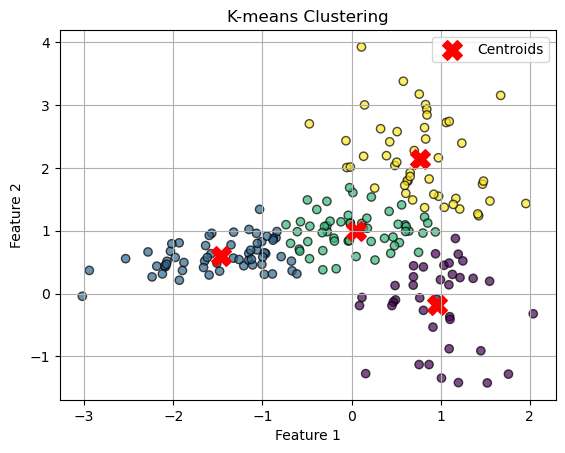

In [40]:
visualize_clusters(Xc_2, final_centroids, final_labels)

In [48]:
from sklearn.cluster import KMeans

knn = KMeans(n_clusters=4, n_init=10, max_iter=100)
knn.fit(Xc_2)

KMeans(max_iter=100, n_clusters=4, n_init=10)

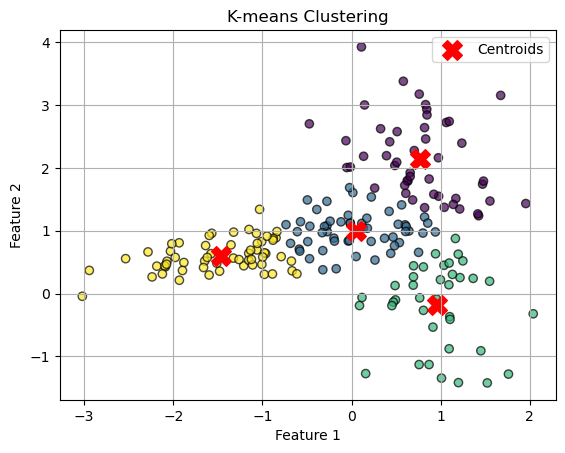

In [49]:
visualize_clusters(Xc_2, knn.cluster_centers_, knn.labels_)

In [53]:
cost_function(Xc_2, knn.cluster_centers_, knn.labels_)

0.4576916248652856

In [54]:
cost_function(Xc_2, final_centroids, final_labels)

0.4576916248652856

0.6220299878612888


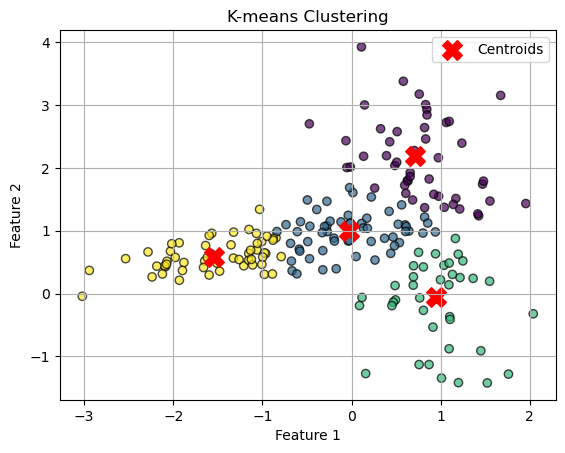

In [72]:
import skfuzzy as fuzz

n_clusters = 4
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(Xc_2.T, 4, 2, error=0.005, maxiter=1000)
print(fpc)
labels = np.argmax(u, axis=0)
visualize_clusters(Xc_2, cntr, labels)

In [73]:
cost_function(Xc_2, cntr, labels)

0.4634128414572309